<a href="https://colab.research.google.com/github/lizsantacruz/calidad_del_vino/blob/main/calidad_del_vino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [74]:
#Carga de datasets
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Examenes/Examen 1/winequality-red.csv', sep=';')
df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Examenes/Examen 1/winequality-white.csv', sep=';')

In [75]:
#Agrego una columna para especificar el tipo de vino por archivo
df1['Tipo']= 'red'
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [76]:
##Agrego una columna para especificar el tipo de vino por archivo
df2['Tipo']= 'white'
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [77]:
#Concateno los datasets
df= pd.concat([df1, df2], axis=0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [78]:
#Verifico informacion del dataset (valores nulos y el tipo de dato)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Tipo                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [79]:
#Elimino valores duplicados
df= df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  Tipo                  5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 581.9+ KB


In [80]:
#verifico valores nulos (en df.info ya pude verificar que no habian valores nulos)
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [81]:
#Ejecuto el resumen estadistico
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [82]:
#Transformo columna con variable categorica en representacion numericas
from sklearn.preprocessing import LabelEncoder
#Codificador
label_encoder = LabelEncoder()
#Transformacion de columna
df['Tipo'] = label_encoder.fit_transform(df['Tipo'])

In [83]:
#Verifico que se halla cambiado el tipo de dato de la columna
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  Tipo                  5320 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 581.9 KB


In [108]:
# Preparación de datos para modelado
X = df.drop(columns='quality')  # Variables independientes
y = df['quality']  # Variable objetivo

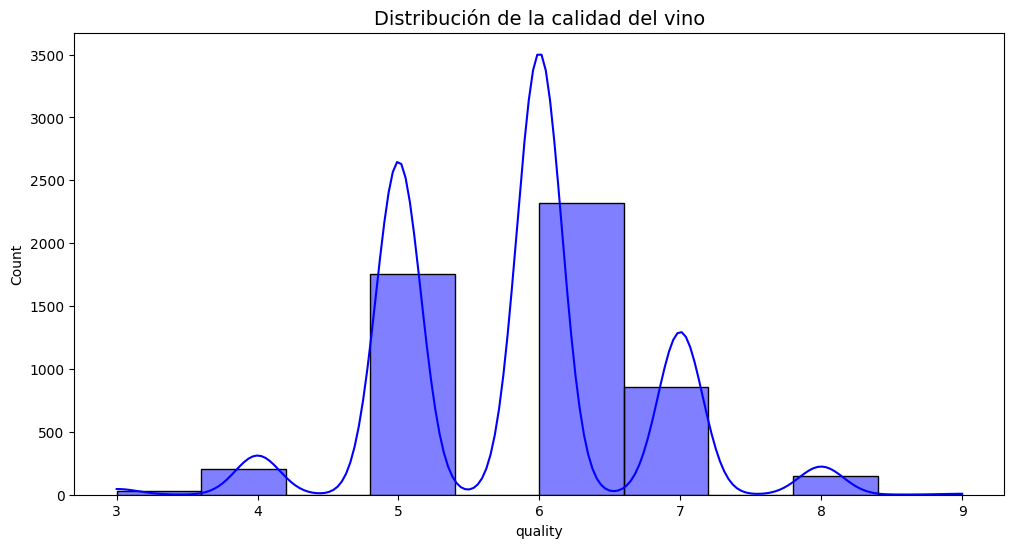

In [109]:
#Distribución de la calidad del vino para identificar patrones
plt.figure(figsize=(12, 6))
sns.histplot(df['quality'], kde=True, bins=10, color='blue')
plt.title("Distribución de la calidad del vino", fontsize=14)
plt.show()

Se observa que la mayoría de las muestras tienen una calidad entre 5 y 6, lo que indica que la mayoría de los vinos son de calidad promedio. Hay muy pocos vinos de calidad extremadamente alta o baja.

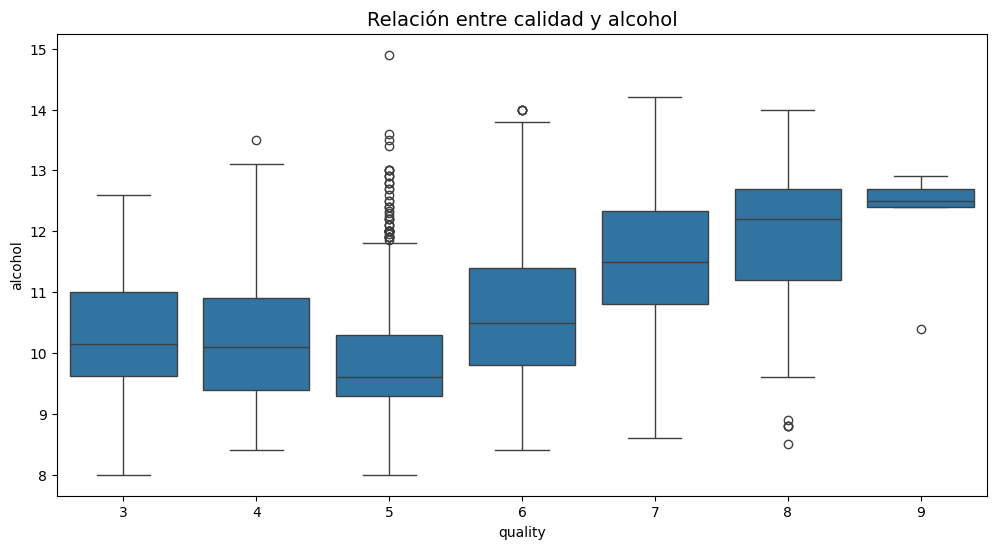

In [110]:
#Relación entre la calidad y el contenido de alcohol en los vinos
plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Relación entre calidad y alcohol", fontsize=14)
plt.show()

Se observa que los vinos con una mayor calidad tienden a tener un mayor porcentaje de alcohol.

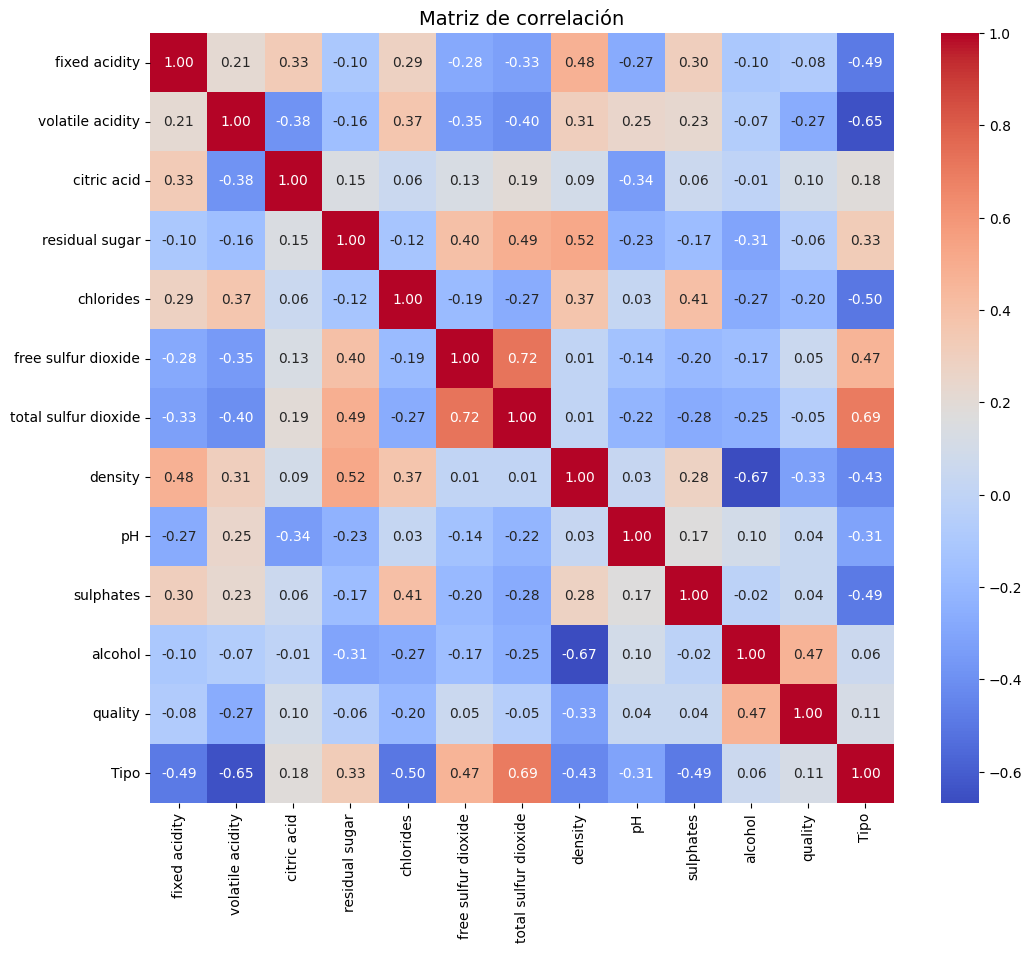

In [107]:
#Matriz de correlación para ver las relaciones entre variables
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación", fontsize=14)
plt.show()

In [113]:
#Division de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
#Normalizo las variables para que todas tengan la misma escala
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Entrenamiento del modelo de Regresión logística
log_model = LogisticRegression()
log_model.fit(X_train, y_train) #Ajuste del modelo con los datos de entrenamiento
y_pred_log = log_model.predict(X_test) #Predicciones con los datos de prueba

#Evaluación del modelo
print("Evaluación del modelo: Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_log)) #Porcentaje de predicciones correctas
print("Precision:", precision_score(y_test, y_pred_log)) #Precisión en las predicciones positivas
print("Recall:", recall_score(y_test, y_pred_log)) #Cobertura de las predicciones positivas
print("F1-Score:", f1_score(y_test, y_pred_log)) #Promedio ponderado de precisión y recall
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_log))  #Detalle completo del rendimiento

Evaluación del modelo: Regresión Logística
Accuracy: 0.743421052631579
Precision: 0.7788595271210014
Recall: 0.8308605341246291
F1-Score: 0.8040201005025126

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.67      0.59      0.63       390
           1       0.78      0.83      0.80       674

    accuracy                           0.74      1064
   macro avg       0.72      0.71      0.72      1064
weighted avg       0.74      0.74      0.74      1064



In [120]:
#Modelo K-Nearest Neighbors (KNN) para la clasificación
knn_model = KNeighborsClassifier(n_neighbors=5) # Usamos 5 vecinos como parámetro inicial
knn_model.fit(X_train, y_train) # Ajustamos el modelo con los datos de entrenamiento
y_pred_knn = knn_model.predict(X_test) # Hacemos predicciones con los datos de prueba

#Evaluación del modelo
print("Evaluación del modelo: KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1-Score:", f1_score(y_test, y_pred_knn))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_knn))

Evaluación del modelo: KNN
Accuracy: 0.7349624060150376
Precision: 0.7729805013927576
Recall: 0.8234421364985163
F1-Score: 0.7974137931034483

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       390
           1       0.77      0.82      0.80       674

    accuracy                           0.73      1064
   macro avg       0.71      0.70      0.71      1064
weighted avg       0.73      0.73      0.73      1064



In [122]:
#Resumen de ambos modelos para comparar resultados
print("Resumen comparativo:")
print(f"Regresión Logística: Accuracy={accuracy_score(y_test, y_pred_log)}, F1-Score={f1_score(y_test, y_pred_log)}")
print(f"KNN: Accuracy={accuracy_score(y_test, y_pred_knn)}, F1-Score={f1_score(y_test, y_pred_knn)}")

Resumen comparativo:
Regresión Logística: Accuracy=0.743421052631579, F1-Score=0.8040201005025126
KNN: Accuracy=0.7349624060150376, F1-Score=0.7974137931034483


Utilice Open IA para realizar alguna correcciones a mi codigo y tambien para comprender mejor alguno puntos que no me quedaban muy claros.